In [1]:
%load_ext autoreload
%autoreload 2
!cd `pwd`

# Tweaking the comma

When we try to remove comma marks, we are confronted with suboptimal results
when using the normal mark parameters.

A case study in tweaking!

Import the fusus package.

See [install](https://among.github.io/fusus/about/install.html).

In [2]:
from fusus.book import Book

In [3]:
B = Book()

Now we have initialized the fusus for the set of examples found in this directory.

## Marks

Let's have a closer look at the marks that are defined in this directory.

Marks and their settings
	band [high]
		  1: «a»                  acc=0.8, bw=4, r=0.1


		  2: «footnote1»          acc=0.8, bw=4, r=0.1


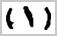

		  3: «footnote2»          acc=0.8, bw=4, r=0.1


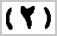

		  4: «footnote3»          acc=0.8, bw=4, r=0.1


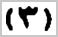

		  5: «footnote4»          acc=0.8, bw=4, r=0.1


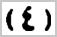

		  6: «footnote5»          acc=0.8, bw=4, r=0.1


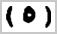

		  7: «footnote6»          acc=0.8, bw=4, r=0.1


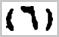

		  8: «footnote7»          acc=0.8, bw=4, r=0.1


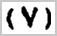

		  9: «footnote8»          acc=0.8, bw=4, r=0.1


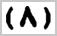

		 11: «shadda.a»           acc=0.8, bw=4, r=0.1


		 10: «shadda.a.2»         acc=0.8, bw=4, r=0.1


		 12: «u»                  acc=0.8, bw=4, r=0.1


		 13: «un»                 acc=0.8, bw=4, r=0.1


	band [low]
		 14: «a»                  acc=0.8, bw=4, r=0.1


		 15: «dash»               acc=0.8, bw=4, r=0.1


	band [mid]
		 16: «bracketClose»       acc=0.8, bw=4, r=0.1


		 17: «bracketOpen»        acc=0.8, bw=4, r=0.1


		 18: «colon»              acc=0.8, bw=4, r=0.1


		 19: «comma»              acc=0.8, bw=4, r=0.1


		 20: «comma2»             acc=0.8, bw=4, r=0.1


		 21: «guillemetClose»     acc=0.8, bw=4, r=0.1


		 22: «guillemetOpen»      acc=0.8, bw=4, r=0.1


		 23: «question»           acc=0.8, bw=4, r=0.1


		 24: «semicolon»          acc=0.8, bw=4, r=0.1


In [4]:
B.availableMarks()

We are interested in number 19: the *comma* in the *mid* band.

Later we will address number 20 as well: `comma2`.

(The mid band is the set of strokes in which most of the ink of the lines fall).

You see that it already has a different set of parameters: 
`acc=0.7, bw=6, r=0.05`.

It got these settings from the file name that stores an example of the comma, which is used as a template
to find them:

In [5]:
!ls marks/mid

bracketClose.png   comma.png          guillemetOpen.png
bracketOpen.png    comma2.png         question.png
colon.png          guillemetClose.png semicolon.png


Below we show how to arrived at good values. First a short explanation:

`acc` *accuracy*: when we search for comma occurrences, we find match candidates together with the accuracy of the match. If the accuracy of a match is below this threshold, we reject the candidate.

`bw` *connect-border-width*: when we have a promising match candidate, we inspect the inside border of the
and the outside border of the match, and give penalties for ink connections between the inside and the outside. This parameter states the width of the inside and outside border that we inspect.
The idea is that if the match is connected to its environment by too much ink, the match is not an instance
of the mark in question, but a part of another letter. Such marks will be rejected.

`r` *connect-ratio*: when we are inspecting the inner and outer borders of a match and have computed
how much ink crosses the border, we express the amount in a ratio: the amount of pixels involved
in ink crossings divided by the total amount of pixels in the border. (In reality it is a bit subtler, though).

## Page preparation

We are going to experiment with these values on a certain example.

Here is the example:

In [6]:
page = B.process(pages=131, batch=False, boxed=True, doOcr=False, uptoLayout=True)

  0.00s Batch of 1 pages: 131
  0.00s Start batch processing images
   |      |      |    -0.00s     1 131.jpg                                 
  1.43s all done
  1.43s all done


We have performed all processing steps before the actual cleaning.

Here is the detected layout:

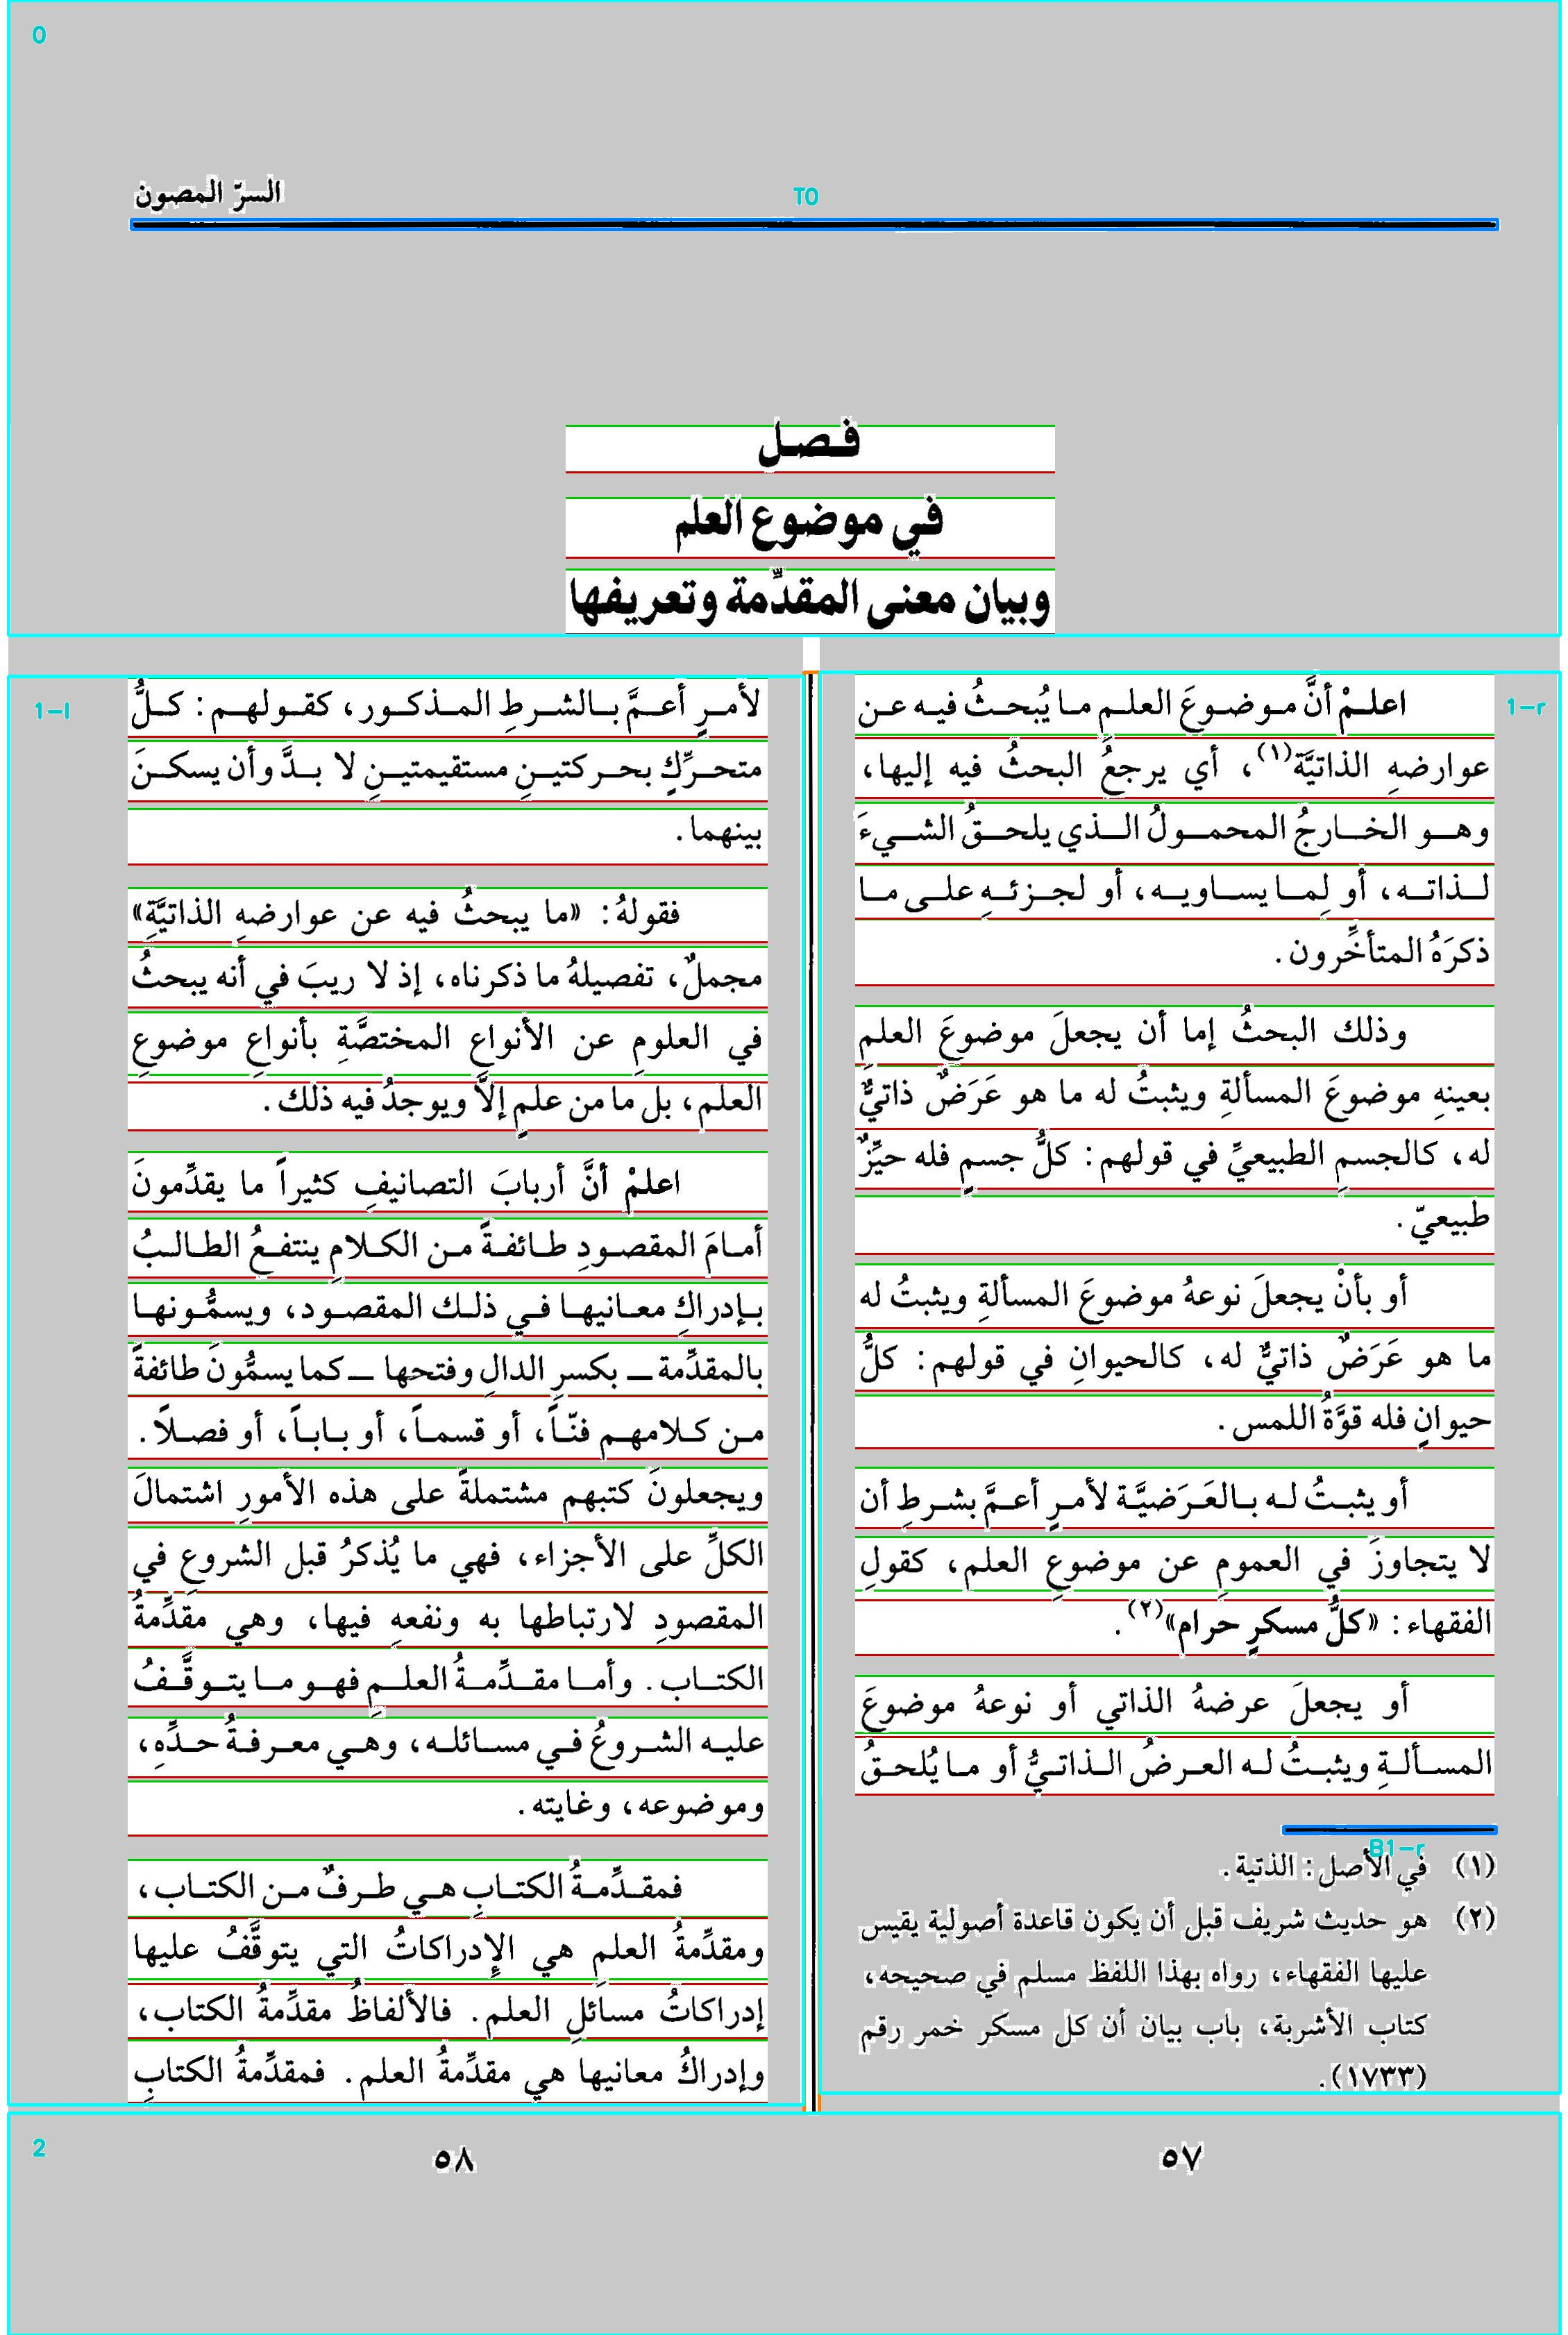

In [7]:
page.show(stage="layout")

Observe block `1-l` line 18. It has one comma.

## Cleaning

Lets see whether we can detect the comma in line 18.

Short explanation of the parameters passed to `_clean()` below:

`mark`: a list of marks, specified by their band and name, with overriding match parameters provided.

`block`: the stripe number and column specification of the block we restrict ourselves to

`line`: the line number of the line we focus on

`showKept`: if matches are discarded because of their ink-connectedness to their environment,
show them in a green box and record the match data.

block 1l line 18 BEFORE/AFTER cleaning



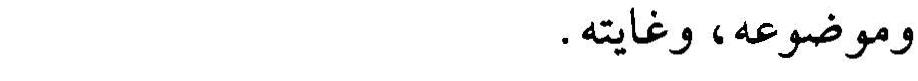

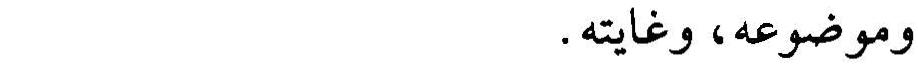

   |     2.89s cleaning done


In [8]:
block = (1, "l")
mark = [("mid", "comma", dict(acc=0.8, bw=4, r=0.1))]

page._clean(mark=mark, block=block, line=18, showKept=True)

Apparently not.

### Tweak the accuracy

Let's decrease the accuracy:

   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


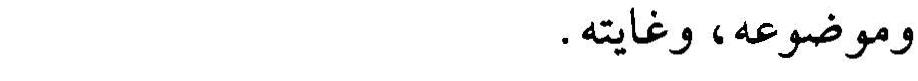

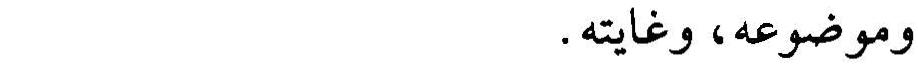

   |     3.87s cleaning done


In [9]:
mark = [("mid", "comma", dict(acc=0.6, bw=4, r=0.1))]

page._clean(mark=mark, block=block, line=18, showKept=True)

Even further:

   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


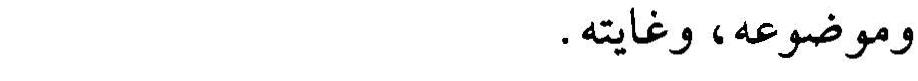

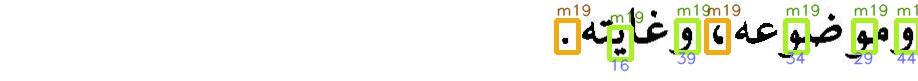

mid


   |   19: comma                wiped    2 x, kept    5 x
   |                            kept     5 x
   |      |   wiped [ 1l] tblr=2590 2622  742  764, value= 0.44 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=2590 2622  892  914, value= 0.50 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr=2590 2622 1082 1104, value= 0.42 conn=0.440 border= 4
   |      |   kept  [ 1l] tblr=2590 2622  862  884, value= 0.47 conn=0.395 border= 4
   |      |   kept  [ 1l] tblr=2597 2629  795  817, value= 0.49 conn=0.156 border= 4
   |      |   kept  [ 1l] tblr=2590 2622  971  993, value= 0.50 conn=0.338 border= 4
   |      |   kept  [ 1l] tblr=2590 2622 1039 1061, value= 0.52 conn=0.290 border= 4
   |     4.53s cleaning done


In [10]:
mark = [("mid", "comma", dict(acc=0.4, bw=4, r=0.1))]

page._clean(mark=mark, block=block, line=18, showKept=True)

Now we have matches.

The orange boxes are matches that will be wiped from the image later on.
The green boxes are matches that are not good enough because of ink connections with the environment.

Now focus on the orange boxes:
we find the comma, but we also find the dot and we cannot get rid of that.

That is bad! With such a low accuracy, we will get many spurious matches.

## A better mark template

But why do we not find the comma in this line?

The shape seems to far off.
The best solution is to create another template, `comma2`, for this mark.

On a Mac, you can do that in Preview
by selecting this occurrence in the image file, and saving it in a new
`comma2.png` file in the `marks` directory.

In [11]:
B.availableMarks(band='mid', mark='comma2')

   |   Marks and their settings
   |   	band [mid]
   |   		 20: «comma2»             acc=0.8, bw=4, r=0.1


   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


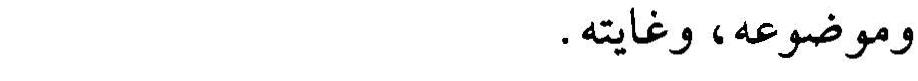

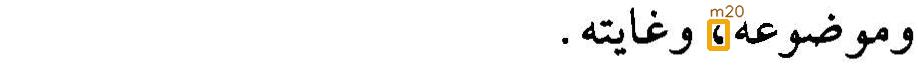

mid


   |   20: comma2               wiped    1 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=2591 2618  895  913, value= 0.99 conn=0.000 border= 4
   |     6.03s cleaning done


In [12]:
mark = [("mid", "comma2", dict(acc=0.8, bw=4, r=0.1))]

page._clean(mark=mark, block=block, line=18, showKept=True)

Very clean match, of course. From now on, we use both comma's, because we want to grow one set of marks
that work for various books.

### Decrease accuracy (again)

For that reason, we do decrease the accuracy a bit, to 0.7

   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


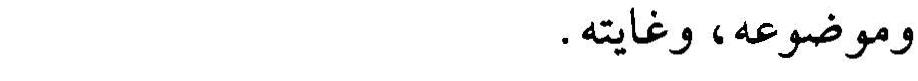

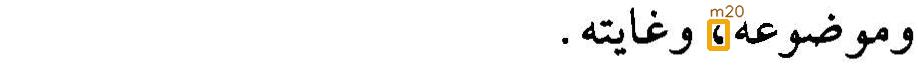

mid


   |   20: comma2               wiped    1 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=2591 2618  895  913, value= 0.99 conn=0.000 border= 4
   |     7.02s cleaning done


In [13]:
mark = [
    ("mid", "comma", dict(acc=0.7, bw=4, r=0.1)),
    ("mid", "comma2", dict(acc=0.7, bw=4, r=0.1)),
]

page._clean(mark=mark, block=block, line=18, showKept=True)

Observe block `1-l` (the left column), line 5.

   |   block 1l line 5 BEFORE/AFTER cleaning
   |   


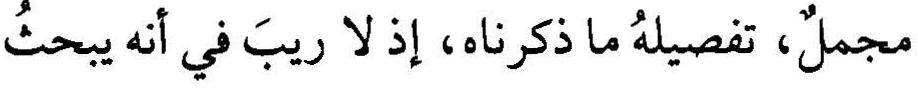

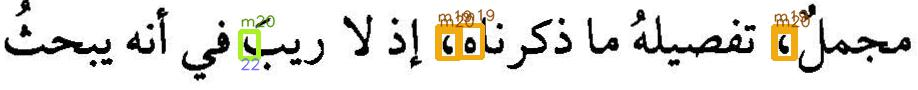

mid


   |   19: comma                wiped    3 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=1393 1425  646  668, value= 0.71 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1394 1426  959  981, value= 0.77 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1394 1426  623  645, value= 0.77 conn=0.000 border= 4


   |   20: comma2               wiped    2 x, kept    1 x
   |                            kept     1 x
   |      |   wiped [ 1l] tblr=1399 1426  625  643, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1399 1426  961  979, value= 0.94 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr=1399 1426  426  444, value= 0.70 conn=0.222 border= 4
   |     7.56s cleaning done


In [14]:
page._clean(mark=mark, block=block, line=5, showKept=True)

It has two commas.
They get detected.

Observe that `comma2` (=`m20`) also has a hit inside a letter, but that match is green.

What is worse is that `comma` (=`m19`) produces a bad match.

So we need to keep the accuracy higher, the wrong match has accuracy 0.71, so if we set 0.75
we get rid of it.

   |   block 1l line 5 BEFORE/AFTER cleaning
   |   


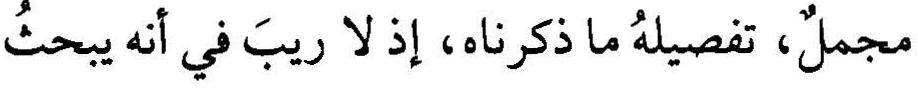

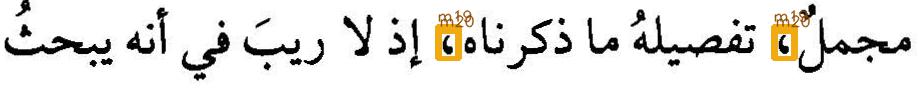

mid


   |   19: comma                wiped    2 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=1394 1426  959  981, value= 0.77 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1394 1426  623  645, value= 0.77 conn=0.000 border= 4


   |   20: comma2               wiped    2 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=1399 1426  625  643, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1399 1426  961  979, value= 0.94 conn=0.000 border= 4
   |     8.51s cleaning done


In [15]:
mark = [
    ("mid", "comma", dict(acc=0.75, bw=4, r=0.1)),
    ("mid", "comma2", dict(acc=0.75, bw=4, r=0.1)),
]

page._clean(mark=mark, block=block, line=5, showKept=True)

Both commas are detected by both `comma` and `comma2`.

### Back to normal accuracy

Better keep it a bit safer, back to 0.8:

   |   block 1l line 5 BEFORE/AFTER cleaning
   |   


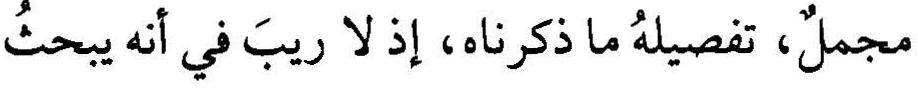

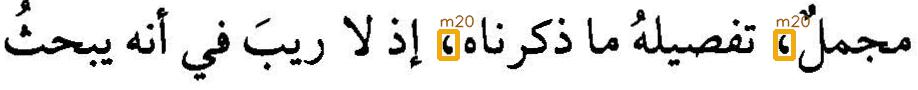

mid


   |   20: comma2               wiped    2 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=1399 1426  625  643, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1399 1426  961  979, value= 0.94 conn=0.000 border= 4
   |     9.25s cleaning done


In [16]:
mark = [
    ("mid", "comma", dict(acc=0.8, bw=4, r=0.1)),
    ("mid", "comma2", dict(acc=0.8, bw=4, r=0.1)),
]

page._clean(mark=mark, block=block, line=5, showKept=True)

As you see, we now totally rely on `comma2`.

So far so good. Let's check the whole page (without the green boxes):

   |      |   20 - mid       : comma2               wiped   22 x, kept    0 x
   |       10s cleaning done
mid


   |   20: comma2               wiped   22 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr=2055 2082  572  590, value= 0.92 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=2055 2082  769  787, value= 0.93 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=2055 2082  398  416, value= 0.93 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1577 1604  981  999, value= 0.93 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=2243 2270 1363 1381, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1655 1682 2091 2109, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=2888 2915  197  215, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=2501 2528  198  216, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1098 1125 1241 1259, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1274 1301 1987 2005, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr=1399 1426  625  

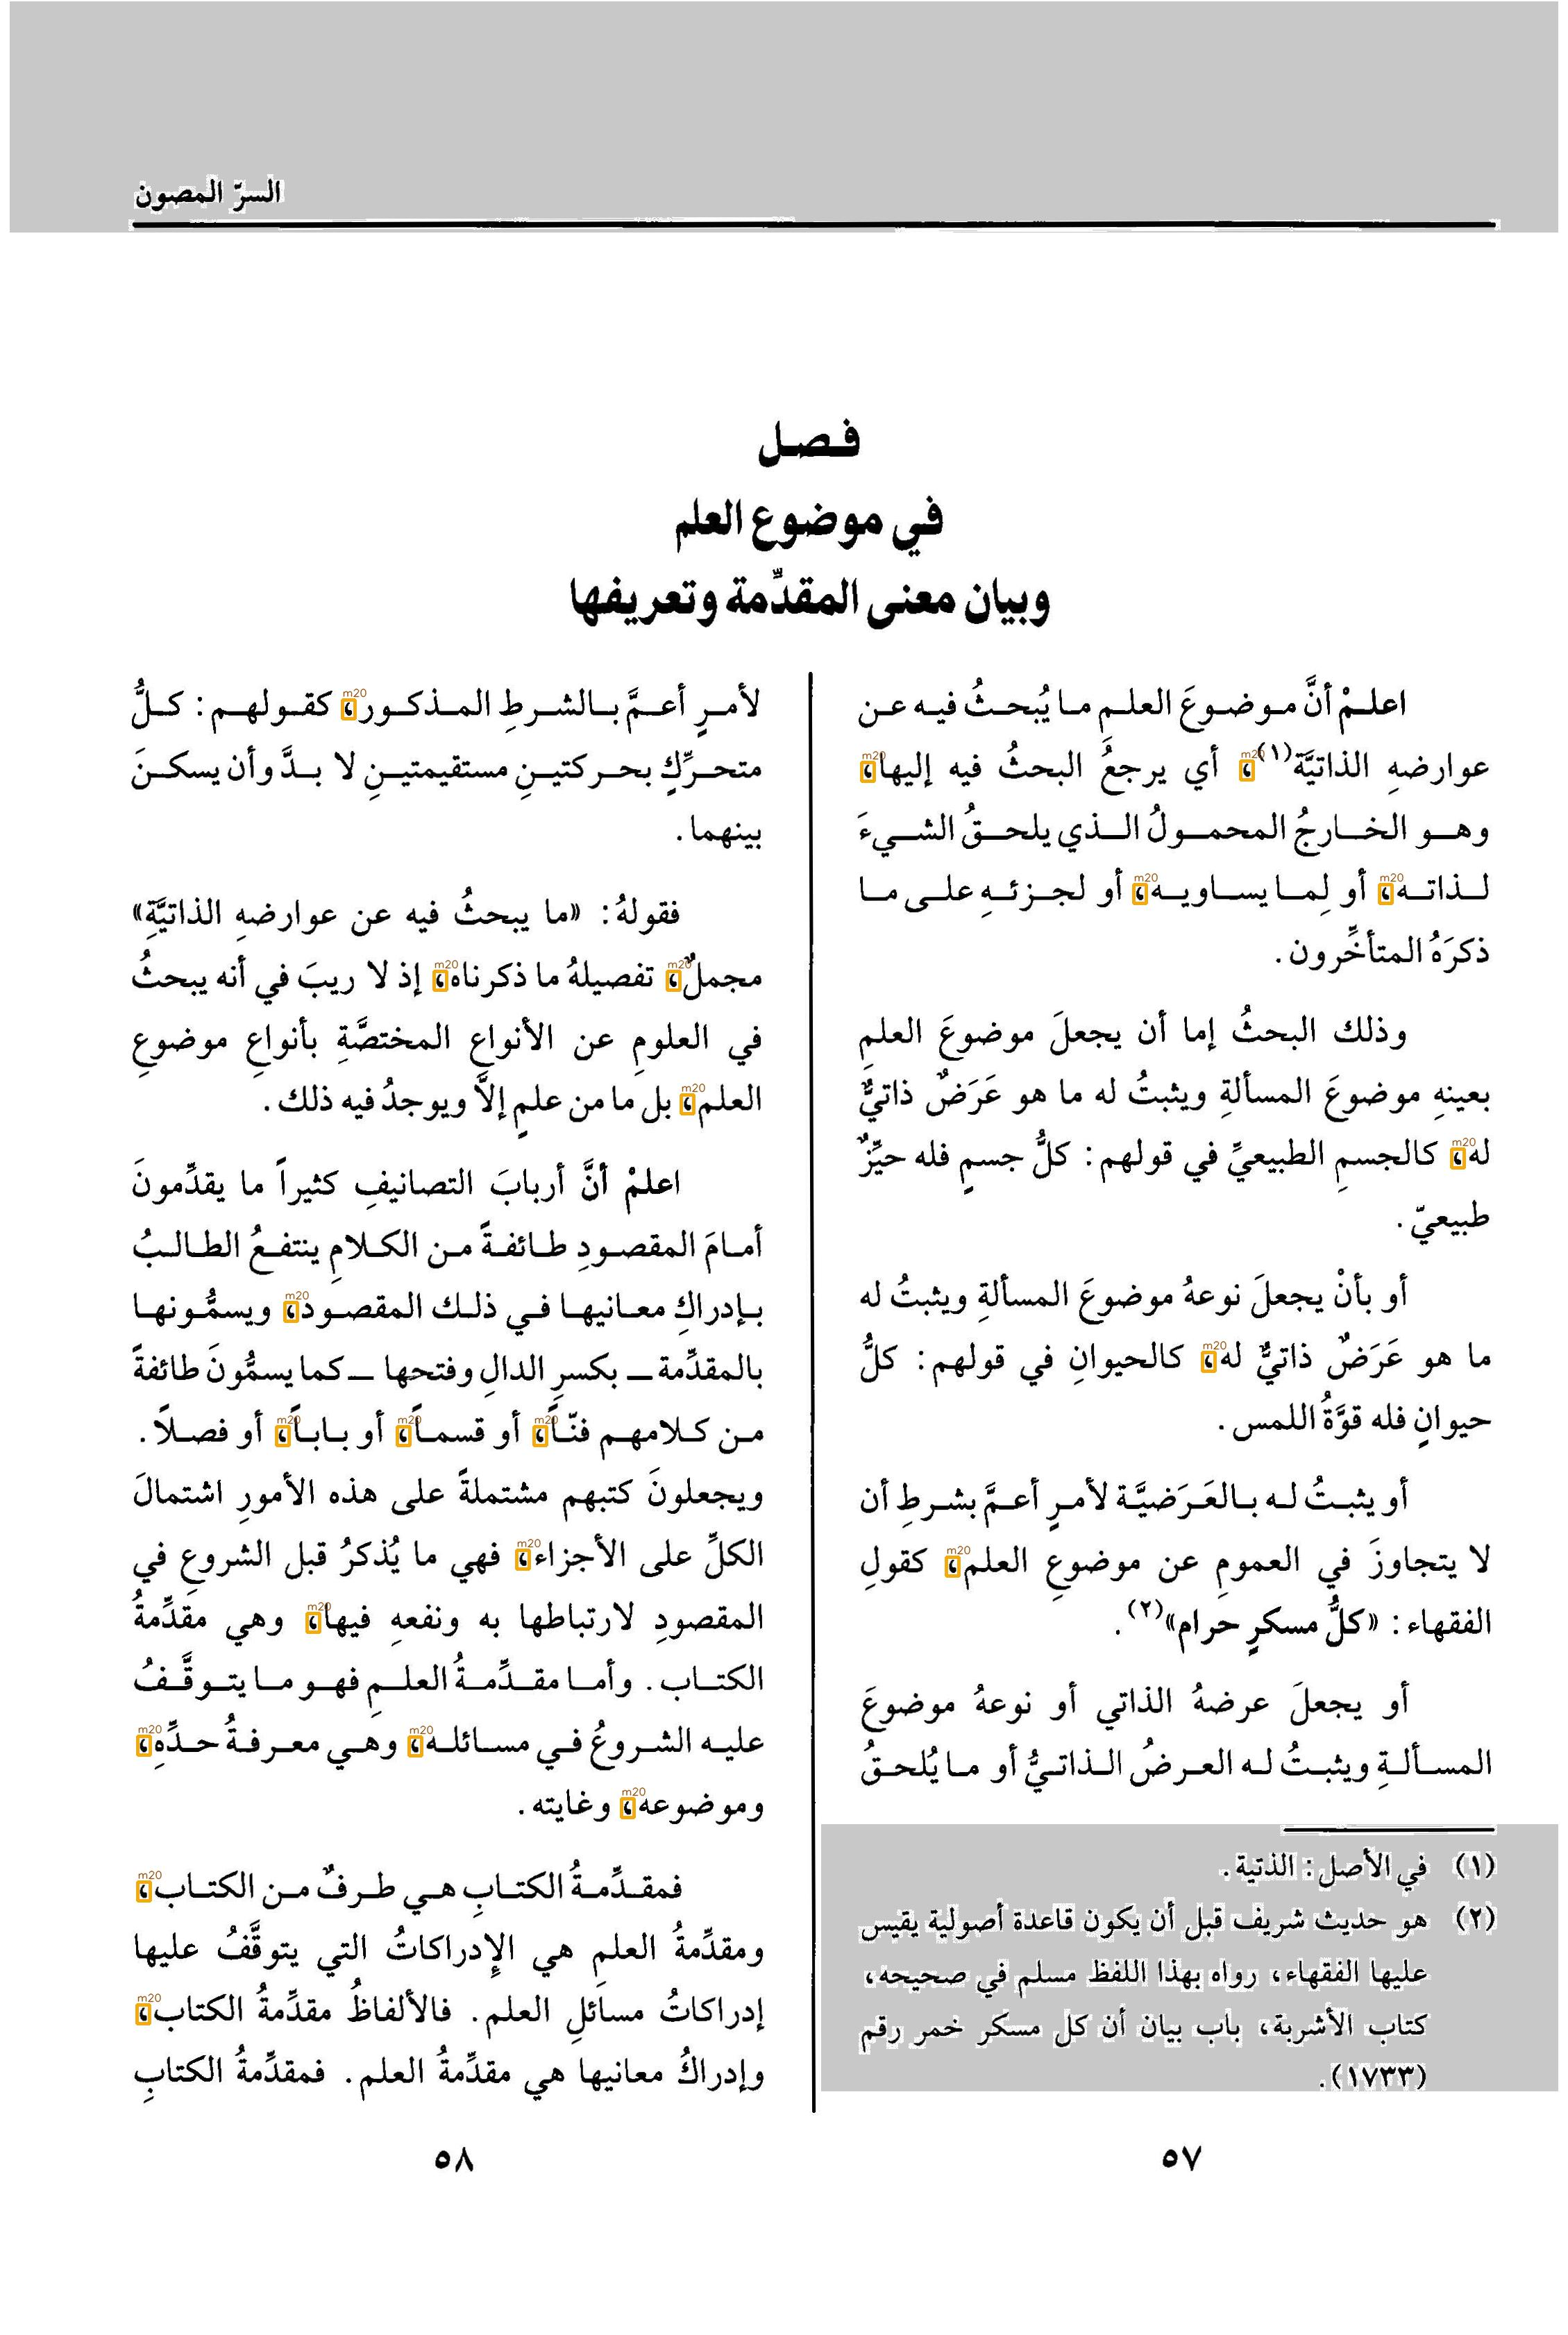

In [17]:
page._clean(mark=mark, block=None, line=None, showKept=False)
page.show(stage="boxed,markData")

Inspection shows that all orange boxes mark true commas, and that none are missed.

### Playing with ink connectedness

There is also another way to reign in matches.

Suppose we have reason to match with `comma` at a low accuracy of `0.6`.
Then we find this:

   |      |   block 1l line 11 BEFORE/AFTER cleaning
   |      |   


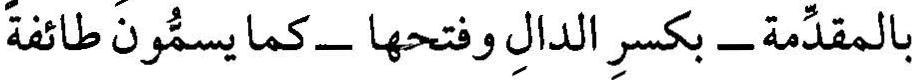

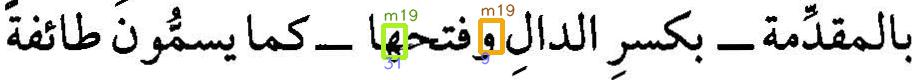

mid


   |   19: comma                wiped    1 x, kept    1 x
   |                            kept     1 x
   |      |   wiped [ 1l] tblr=1958 1990  666  688, value= 0.67 conn=0.091 border= 4
   |      |   kept  [ 1l] tblr=1963 1995  569  591, value= 0.61 conn=0.312 border= 4
   |       13s cleaning done


In [18]:
mark = [
    ("mid", "comma", dict(acc=0.6, bw=4, r=0.1)),
]

page._clean(mark=mark, block=block, line=11, showKept=True)
# page.show(stage="boxed,markData")

The orange box is the bad news. It is found with an accuracy of 0.67, and we did not want to raise our accuracy. 

But we see ink between the match and the surroundings. Not much, the connectedness is 0.091, just below our `r=0.1`.

We can be more strict on that:

   |   block 1l line 11 BEFORE/AFTER cleaning
   |   


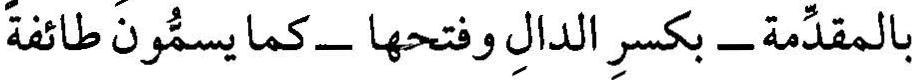

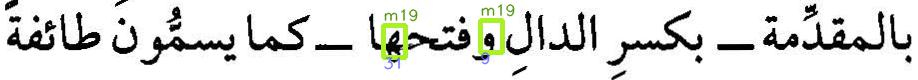

mid


   |   19: comma                wiped    0 x, kept    2 x
   |                            kept     2 x
   |      |   kept  [ 1l] tblr=1963 1995  569  591, value= 0.61 conn=0.312 border= 4
   |      |   kept  [ 1l] tblr=1958 1990  666  688, value= 0.67 conn=0.091 border= 4
   |       14s cleaning done


In [19]:
mark = [
    ("mid", "comma", dict(acc=0.6, bw=4, r=0.05)),
]

page._clean(mark=mark, block=block, line=11, showKept=True)

Lo and behold, the orange box has turned to green, this comma will not be wiped out.

## Lesson
 
The upshot is:

Apply search templates with enough accuracy (>= 0.8).
If you miss matches, it is dangerous to lower the accuracy, because you can get a lot of spurious
matches. Most of these will be discarded on the basis of ink connections, but not all.

It is better to add other mark templates that fit the missed occurrences better.